# Loading package

In [26]:
!pip install ktrain

# Import library

In [27]:
import ktrain
from ktrain import tabular

import pandas as pd

# static

In [28]:
TRAIN_PATH = '/content/drive/MyDrive/student_cup_2021/dataset/train.csv'
TEST_PATH = '/content/drive/MyDrive/student_cup_2021/dataset/test.csv'

# start

In [29]:
df_train = pd.read_csv(TRAIN_PATH)
df_test = pd.read_csv(TEST_PATH)
df_train.head()

,index,genre,popularity,duration_ms,acousticness,positiveness,danceability,loudness,energy,liveness,speechiness,instrumentalness,tempo,region
0,0,10,11,201094,0.112811,0.157247,0.187841,-1.884852,0.893918,0.363568,0.390108,0.888884,121-152,region_H
1,1,8,69,308493,0.101333,0.346563,0.554444,-5.546495,0.874409,0.193892,0.161497,0.123910,153-176,region_I
2,2,3,43,197225,0.496420,0.265391,0.457642,-9.255670,0.439933,0.217146,0.369057,0.166470,64-76,region_E
3,3,10,45,301092,0.165667,0.245533,0.356578,-5.088788,0.868704,0.377025,0.226677,0.175399,177-192,region_C
4,4,3,57,277348,0.190720,0.777578,0.830479,-3.933896,0.650149,0.169323,0.222488,0.226030,97-120,unknown


In [30]:
df_train = df_train.drop(['index'], axis=1)
train, val, preproc = tabular.tabular_from_df(df_train, label_columns=['genre'], random_state=2021)

processing train: 3657 rows x 13 columns
['genre_0', 'genre_1', 'genre_2', 'genre_3', 'genre_4', 'genre_5', 'genre_6', 'genre_7', 'genre_8', 'genre_9', 'genre_10']
   genre_0  genre_1  genre_2  genre_3  ...  genre_7  genre_8  genre_9  genre_10
0      0.0      0.0      0.0      0.0  ...      0.0      0.0      0.0       1.0
2      0.0      0.0      0.0      1.0  ...      0.0      0.0      0.0       0.0
3      0.0      0.0      0.0      0.0  ...      0.0      0.0      0.0       1.0
4      0.0      0.0      0.0      1.0  ...      0.0      0.0      0.0       0.0
5      0.0      0.0      0.0      0.0  ...      0.0      0.0      0.0       1.0

[5 rows x 11 columns]
processing test: 389 rows x 13 columns
['genre_0', 'genre_1', 'genre_2', 'genre_3', 'genre_4', 'genre_5', 'genre_6', 'genre_7', 'genre_8', 'genre_9', 'genre_10']
    genre_0  genre_1  genre_2  genre_3  ...  genre_7  genre_8  genre_9  genre_10
1       0.0      0.0      0.0      0.0  ...      0.0      1.0      0.0       0.0
11      0

In [31]:
train.df

,popularity,duration_ms,acousticness,positiveness,danceability,loudness,energy,liveness,speechiness,instrumentalness,tempo,region,genre_0,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8,genre_9,genre_10,positiveness_na,danceability_na,liveness_na,speechiness_na,instrumentalness_na
0,-1.851834,-0.477651,-0.966432,-1.358873,-1.996019,1.417108,1.446113,0.628629,2.297406,4.386398,121-152,region_H,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,False,False,False,False,False
2,0.123582,-0.522500,0.625004,-0.880427,-0.294463,-0.373732,-0.820925,-0.313979,2.045630,-0.310660,64-76,region_E,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,False,False
3,0.247045,0.681503,-0.747155,-0.968282,-0.931842,0.638668,1.320202,0.715256,0.342735,-0.252602,177-192,region_C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,False,False,False,False,False
4,0.987826,0.406268,-0.643218,1.385578,2.056915,0.919265,0.228819,-0.621845,0.292635,0.076596,97-120,unknown,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,False,False
5,-0.555467,0.119452,-1.017785,-1.038338,0.525454,0.662243,1.026813,4.482709,0.454492,-0.387460,97-120,region_I,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4041,-0.185077,0.046471,-0.900124,-0.595831,0.450919,0.598882,-0.473379,-0.464389,-0.127851,-0.364451,121-152,region_P,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,False,False,False,False,False
4042,-1.111053,-0.389090,1.796203,-1.042502,-0.694047,-1.581269,-1.405488,-0.082470,-0.679362,0.528980,121-152,region_D,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,False,False,False,False,False
4043,-0.678931,1.909350,0.233505,-0.008936,1.059103,-0.727386,0.210948,-0.242889,-0.547180,-0.330081,97-120,region_E,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,False,False,False,False,False
4044,-0.987590,-0.432872,-0.571136,0.004941,0.120972,-0.033650,-0.476477,-0.116508,0.050443,-0.026436,77-96,region_R,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,False,False,False,False,False


In [32]:
tabular.print_tabular_classifiers()

mlp: a configurable multilayer perceptron with categorical variable embeddings [https://arxiv.org/abs/1604.06737]


In [33]:
model = tabular.tabular_classifier('mlp', train)

learner = ktrain.get_learner(model, train_data=train, val_data=val, batch_size=32)

Is Multi-Label? False
done.


simulating training for different learning rates... this may take a few moments...
Epoch 1/5
114/114 [==============================] - 4s 21ms/step - loss: 2.4419 - accuracy: 0.0734
Epoch 2/5
114/114 [==============================] - 2s 21ms/step - loss: 2.3433 - accuracy: 0.2360
Epoch 3/5
114/114 [==============================] - 2s 21ms/step - loss: 1.5101 - accuracy: 0.5085
Epoch 4/5
114/114 [==============================] - 2s 21ms/step - loss: 1.7554 - accuracy: 0.4584
Epoch 5/5
114/114 [==============================] - 2s 21ms/step - loss: 1.8126 - accuracy: 0.3283


done.
Visually inspect loss plot and select learning rate associated with falling loss


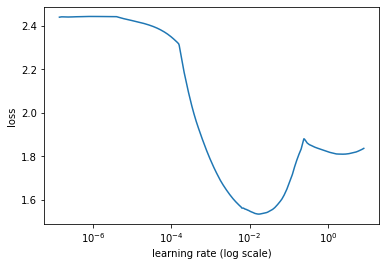

In [34]:
learner.lr_find(show_plot=True, max_epochs=5)

In [35]:
learner.fit_onecycle(1e-2, 30)



begin training using onecycle policy with max lr of 0.01...
Epoch 1/30
115/115 [==============================] - 4s 26ms/step - loss: 1.4789 - accuracy: 0.4892 - val_loss: 1.2550 - val_accuracy: 0.5527
Epoch 2/30
115/115 [==============================] - 3s 24ms/step - loss: 1.2403 - accuracy: 0.5570 - val_loss: 1.2201 - val_accuracy: 0.5733
Epoch 3/30
115/115 [==============================] - 3s 24ms/step - loss: 1.1353 - accuracy: 0.5887 - val_loss: 1.1826 - val_accuracy: 0.6015
Epoch 4/30
115/115 [==============================] - 3s 23ms/step - loss: 1.0653 - accuracy: 0.6202 - val_loss: 1.0791 - val_accuracy: 0.6324
Epoch 5/30
115/115 [==============================] - 3s 24ms/step - loss: 0.9958 - accuracy: 0.6393 - val_loss: 1.0815 - val_accuracy: 0.6195
Epoch 6/30
115/115 [==============================] - 3s 24ms/step - loss: 0.9674 - accuracy: 0.6407 - val_loss: 1.0578 - val_accuracy: 0.6272
Epoch 7/30
115/115 [==============================] - 3s 24ms/step - loss: 0.916

In [36]:
learner.evaluate(val, class_names=preproc.get_classes())

              precision    recall  f1-score   support

     genre_0       0.00      0.00      0.00         2
     genre_1       0.20      0.19      0.19        16
     genre_2       0.47      0.54      0.50        13
     genre_3       0.83      0.83      0.83        42
     genre_4       0.00      0.00      0.00         1
     genre_5       0.79      0.65      0.71        17
     genre_6       1.00      0.38      0.55         8
     genre_7       0.43      0.50      0.46        32
     genre_8       0.72      0.75      0.73       135
     genre_9       1.00      0.75      0.86         4
    genre_10       0.76      0.76      0.76       119

    accuracy                           0.69       389
   macro avg       0.56      0.49      0.51       389
weighted avg       0.70      0.69      0.69       389



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[  0,   0,   0,   0,   0,   0,   0,   0,   2,   0,   0],
       [  0,   3,   1,   1,   0,   0,   0,   1,   4,   0,   6],
       [  0,   0,   7,   2,   0,   0,   0,   1,   2,   0,   1],
       [  0,   1,   0,  35,   0,   0,   0,   2,   4,   0,   0],
       [  0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   1,   1,   0,  11,   0,   1,   0,   0,   3],
       [  0,   2,   0,   0,   1,   0,   3,   0,   2,   0,   0],
       [  0,   1,   1,   0,   0,   1,   0,  16,   9,   0,   4],
       [  0,   4,   2,   2,   1,   1,   0,  10, 101,   0,  14],
       [  0,   0,   0,   0,   0,   0,   0,   0,   1,   3,   0],
       [  0,   4,   3,   0,   0,   1,   0,   6,  15,   0,  90]])

In [37]:
predictor = ktrain.get_predictor(learner.model, preproc)

preds = predictor.predict(df_test.drop(['index'],axis=1), return_proba=True)

/usr/local/lib/python3.7/dist-packages/ktrain/tabular/preprocessor.py:399: UserWarning: There are nan values in field acousticness but there were none in the training set. 
                Filled with median.
  Filled with {self.fill_strategy}.""")
/usr/local/lib/python3.7/dist-packages/ktrain/tabular/preprocessor.py:399: UserWarning: There are nan values in field energy but there were none in the training set. 
                Filled with median.
  Filled with {self.fill_strategy}.""")


['genre_0', 'genre_1', 'genre_2', 'genre_3', 'genre_4', 'genre_5', 'genre_6', 'genre_7', 'genre_8', 'genre_9', 'genre_10']
   genre_0  genre_1  genre_2  genre_3  ...  genre_7  genre_8  genre_9  genre_10
0      1.0      0.0      0.0      0.0  ...      0.0      0.0      0.0       0.0
1      1.0      0.0      0.0      0.0  ...      0.0      0.0      0.0       0.0
2      1.0      0.0      0.0      0.0  ...      0.0      0.0      0.0       0.0
3      1.0      0.0      0.0      0.0  ...      0.0      0.0      0.0       0.0
4      1.0      0.0      0.0      0.0  ...      0.0      0.0      0.0       0.0

[5 rows x 11 columns]


In [44]:
predictor.explain(df_test.drop(['index'],axis=1), row_index=4046, class_id=1)

/usr/local/lib/python3.7/dist-packages/ktrain/tabular/predictor.py:81: UserWarning: TabularPredictor.explain requires shap library. Please install with: pip install shap. Conda users should use this command instead: conda install -c conda-forge shap
  warnings.warn(msg)


In [41]:
import numpy as np

df_sub = pd.concat([df_test['index'].reset_index(drop=True), pd.DataFrame(np.argmax(preds, axis=1), columns=['predicted']).astype(int)], axis=1)
df_sub.to_csv('/content/drive/MyDrive/student_cup_2021/dataset/submission.csv', index=False, header=False)

df_sub.head()

,index,predicted
0,4046,5
1,4047,8
2,4048,8
3,4049,10
4,4050,8
